In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rojas\.cache\kagglehub\datasets\elikplim\car-evaluation-data-set\versions\1


In [33]:
df_car = pd.read_csv('C:\\Users\\rojas\\.cache\\kagglehub\\datasets\\elikplim\\car-evaluation-data-set\\versions\\1\\car_evaluation.csv')
df_car.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [34]:
df_car.shape

(1727, 7)

In [35]:
columns_name = ['buying','maint','doors','persons','lug_boot','safety','class']
df_car.columns = columns_name
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [36]:
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [37]:
df_car['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [38]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [39]:
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [41]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1208, 6) (519, 6)
(1208,) (519,)


In [42]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


In [43]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
# import category_encoders as ce
# encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.fit_transform(X_test)

In [51]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
X_train=pd.DataFrame(ord_enc.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(ord_enc.fit_transform(X_test), columns=X_test.columns)



In [52]:
X_train.dtypes

buying      float64
maint       float64
doors       float64
persons     float64
lug_boot    float64
safety      float64
dtype: object

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=0)


In [54]:
tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [55]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [56]:
print(y_train_pred_tree)

['acc' 'unacc' 'unacc' ... 'unacc' 'unacc' 'acc']


## Evaluacion del modelo

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



train_accuracy_tree = accuracy_score(y_train,y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test,y_test_pred_tree)
train_f1_tree = f1_score(y_train, y_train_pred_tree, average='weighted')
test_f1_tree = f1_score(y_test, y_test_pred_tree, average='weighted')

print("El accuracy en train tree es ", train_accuracy_tree)
print("El accuracy en test tree es ", test_accuracy_tree)
print("El f1 score en train tree es: ", train_f1_tree)
print("El f1 score en test tree es: ", test_f1_tree)

El accuracy en train tree es  0.7673841059602649
El accuracy en test tree es  0.7726396917148363
El f1 score en train tree es:  0.7329676594491352
El f1 score en test tree es:  0.739057010087272


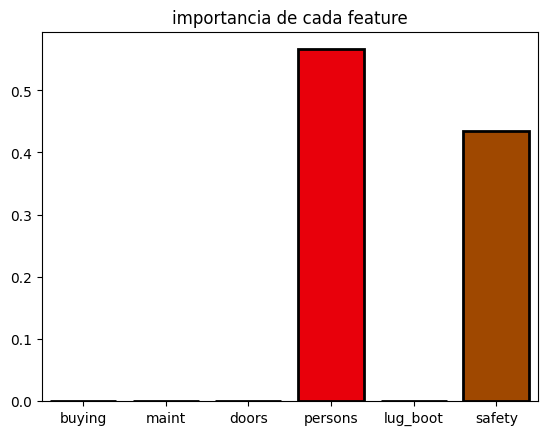

In [61]:
importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)

sns.barplot(data, palette='bright', saturation=2.0, edgecolor ='black', linewidth =2)
plt.title('importancia de cada feature')
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators=8, random_state=0)
rf.fit(X_train, y_train)


,n_estimators,8
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train,y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test,y_test_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

print("El accuracy en train rf es ", train_accuracy_rf)
print("El accuracy en test rf es ", test_accuracy_rf)
print("El f1 score en train rf es: ", train_f1_rf)
print("El f1 score en test rf es: ", test_f1_rf)

El accuracy en train rf es  0.9950331125827815
El accuracy en test rf es  0.9441233140655106
El f1 score en train rf es:  0.9950343995303743
El f1 score en test rf es:  0.9429246637084033


In [80]:
features_scores = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
features_scores

safety      0.264964
persons     0.219527
buying      0.215269
maint       0.146685
lug_boot    0.082615
doors       0.070939
dtype: float64

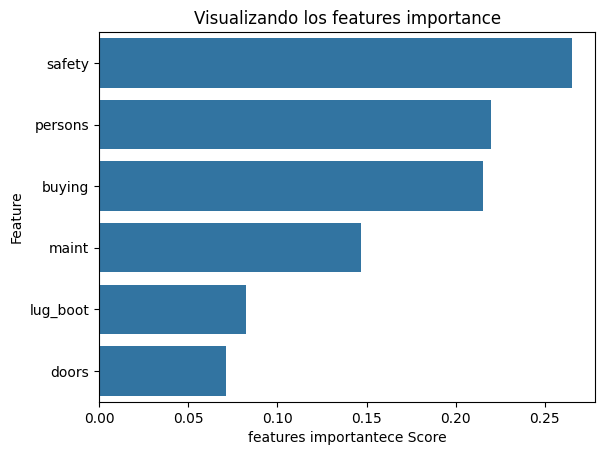

In [81]:
sns.barplot(x=features_scores,y=features_scores.index)
plt.xlabel('features importantece Score')
plt.ylabel('Feature')
plt.title('Visualizando los features importance')

plt.show()

In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print("Confusion matrix:\n ",cm)

Confusion matrix:
  [[105   4   7   2]
 [  4   9   0   4]
 [  4   0 357   0]
 [  4   0   0  19]]


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.87      0.90      0.88       118
        good       0.67      0.35      0.46        17
       unacc       0.98      0.99      0.98       361
       vgood       0.76      0.83      0.79        23

    accuracy                           0.94       519
   macro avg       0.82      0.77      0.78       519
weighted avg       0.94      0.94      0.94       519

